In [107]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Loading train data
train=pd.read_csv('train_LZdllcl.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.shape

(54808, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [109]:
# Loading Test Data
test=pd.read_csv('test_2umaH9m.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [110]:
test.shape

(23490, 13)

In [111]:
# Merging both Train and Test data for convenience in updations
train['source']='train'
test['source']='test'
data=pd.concat([train,test],sort=False,ignore_index=True)  # sort =False to retain the column order
data.shape

(78298, 15)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
employee_id             78298 non-null int64
department              78298 non-null object
region                  78298 non-null object
education               74855 non-null object
gender                  78298 non-null object
recruitment_channel     78298 non-null object
no_of_trainings         78298 non-null int64
age                     78298 non-null int64
previous_year_rating    72362 non-null float64
length_of_service       78298 non-null int64
KPIs_met >80%           78298 non-null int64
awards_won?             78298 non-null int64
avg_training_score      78298 non-null int64
is_promoted             54808 non-null float64
source                  78298 non-null object
dtypes: float64(2), int64(7), object(6)
memory usage: 9.0+ MB


In [10]:
# Let's have a look at the data
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


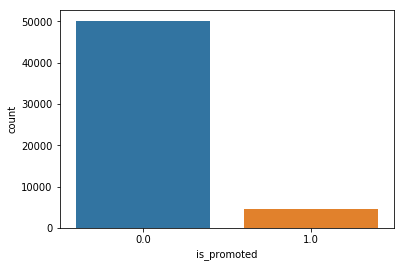

In [11]:
# Checking whether target variable is balanced or not
sns.countplot(data['is_promoted'])
plt.show()

In [193]:
data['is_promoted'].value_counts(normalize=True)*100

0.0    91.482995
1.0     8.517005
Name: is_promoted, dtype: float64

In [ ]:
# data is highly imbalanced.. we will treat it in modelling stage!

In [12]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'source'],
      dtype='object')

In [138]:
# Checking Null Values:
data.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
source                      0
dtype: int64

##  Predictor Variables Analysis

### Column: 'department'

In [137]:
data['department'].isna().sum()   # No Null Values

0

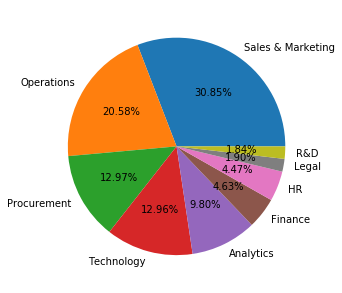

In [163]:
d=data['department'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(d,labels=d.index,autopct='%1.2f%%')
plt.show()

In [ ]:
# Maximum no. of employees in the data are from 'Sales and Marketing' Department

In [191]:
d=data.groupby('department')['is_promoted'].value_counts(normalize=True)*100
d=d.reset_index(name='Chances')

,department,is_promoted,Chances
6,Legal,0.0,94.898941
4,HR,0.0,94.375517
12,R&D,0.0,93.093093
14,Sales & Marketing,0.0,92.796912
2,Finance,0.0,91.876972
8,Operations,0.0,90.985196
0,Analytics,0.0,90.433483
10,Procurement,0.0,90.361446
16,Technology,0.0,89.240684
17,Technology,1.0,10.759316


           department  is_promoted    Chances
17         Technology          1.0  10.759316
11        Procurement          1.0   9.638554
1           Analytics          1.0   9.566517
9          Operations          1.0   9.014804
3             Finance          1.0   8.123028
15  Sales & Marketing          1.0   7.203088
13                R&D          1.0   6.906907
5                  HR          1.0   5.624483
7               Legal          1.0   5.101059


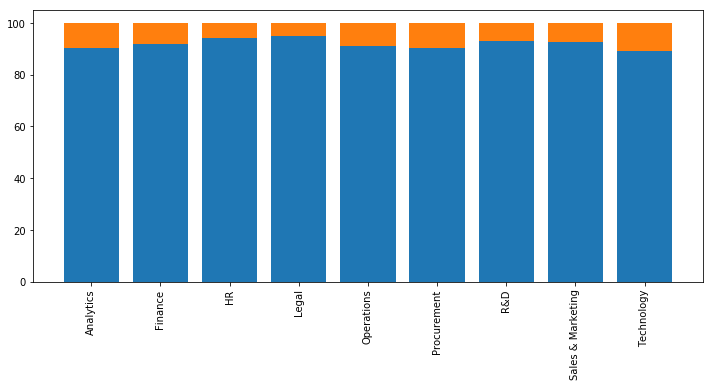

In [192]:
y=d[d['is_promoted']==1]
print(y.sort_values(by='Chances',ascending=False))
n=d[d['is_promoted']==0]
plt.figure(figsize=(12,5))
plt.bar(n.department,n['Chances'])
plt.bar(y.department,y['Chances'],bottom=n['Chances'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Maximum chances of promotion are in 'Technology' Department with 10.75% followed by 'Procurement' and 'Analytics'

### Column : 'region'

In [141]:
data.region.nunique()  # no null values!

34

In [ ]:
# Region feature has 34 categories... Let's do Feature Engineering to reduce the categories

### Feature Engineering: Reducing number of categories in 'Region' on the basis of promotion chances

In [195]:
# Identifying regions with higher promotion percentages
region_isp=data.groupby('region')['is_promoted'].value_counts(normalize=True)*100
df=region_isp.reset_index(name='region_wise_promotions%')
df2=df[df['is_promoted']==1]
df2.sort_values(by='region_wise_promotions%',ascending=False).head()
#displays the Top 5 regions with maximum promotions

,region,is_promoted,region_wise_promotions%
57,region_4,1.0,14.445097
17,region_17,1.0,13.693467
35,region_25,1.0,12.576313
41,region_28,1.0,11.684370
31,region_23,1.0,11.659574


In [196]:
df2.sort_values(by='region_wise_promotions%',ascending=False).describe()

,is_promoted,region_wise_promotions%
count,34.0,34.000000
mean,1.0,7.399441
std,0.0,3.279205
min,1.0,1.904762
25%,1.0,4.586313
50%,1.0,7.229717
75%,1.0,9.376201
max,1.0,14.445097


In [146]:
binedges=[1.904761 ,4.586313, 7.229717, 9.376201,14.445097 ]
binlabels=['less_chances','below_average_chances','average_chances','high_chances']
df2['region_wise_promotions_chances']=pd.cut(df2['region_wise_promotions%'],bins=binedges,labels=binlabels)
df2.head()

C:\Users\deep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,region,is_promoted,region_wise_promotions%,region_wise_promotions_chances
1,region_1,1.0,9.508197,high_chances
3,region_10,1.0,7.870370,average_chances
5,region_11,1.0,5.627376,below_average_chances
7,region_12,1.0,6.600000,below_average_chances
9,region_13,1.0,8.685801,average_chances


In [147]:
# Feature Engineering: Creating a new column identfying regions on the basis of promotion chances
d=df2.set_index('region')['region_wise_promotions_chances'].to_dict()
data['cat_region']=data['region'].map(d)

In [148]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source,cat_region
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train,high_chances
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train,high_chances
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train,below_average_chances
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train,high_chances
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train,below_average_chances


### Column: Education

In [149]:
data.education.unique() # Null Values will have to be treated

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [150]:
data.groupby('education')['is_promoted'].value_counts(normalize=True)*100

education         is_promoted
Bachelor's        0.0            91.796886
                  1.0             8.203114
Below Secondary   0.0            91.677019
                  1.0             8.322981
Master's & above  0.0            90.144054
                  1.0             9.855946
Name: is_promoted, dtype: float64

In [27]:
# Inference: Employees having eduaction- "Master's & above"  are more likely to be promoted over other 2 options

### Null Value Imputation:  Replacing Null values in Education by Department wise mode

In [151]:
# Null Value Imputation:  Replacing Null values in Education by Department wise mode
data.groupby('department')['education'].describe()

,count,unique,top,freq
department,,,,
Analytics,7179,2,Bachelor's,5681
Finance,3577,3,Bachelor's,2683
HR,3457,3,Bachelor's,2210
Legal,1478,3,Bachelor's,1150
Operations,15794,3,Bachelor's,11079
Procurement,10046,3,Bachelor's,6200
R&D,1399,2,Bachelor's,769
Sales & Marketing,21917,2,Bachelor's,15917
Technology,10008,3,Bachelor's,6558


In [152]:
data.education.isnull().sum()

3443

In [153]:
# Since In each department maximum no. of employees have education - 'Bachelor's', so I'll simply impute null values with it.
data.education.fillna("Bachelor's",inplace=True)

In [154]:
data.education.isnull().sum()

0

### Column: Gender:

In [155]:
data.gender.unique()

array(['f', 'm'], dtype=object)

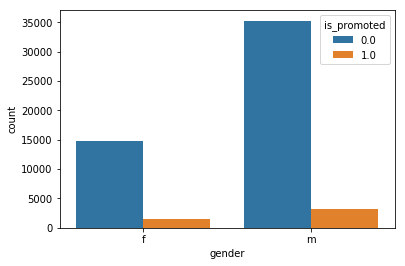

In [156]:
sns.countplot(data['gender'],hue=data['is_promoted']);

In [157]:
data.groupby('gender')['is_promoted'].value_counts(normalize=True)

gender  is_promoted
f       0.0            0.910066
        1.0            0.089934
m       0.0            0.916849
        1.0            0.083151
Name: is_promoted, dtype: float64

In [158]:
# Inference: Since percent of promotions per males and females individually are similar ~ 8% .. 
#Thus we  can say gender bias is not affecting promotions

In [37]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'source', 'cat_region'],
      dtype='object')

### Column: 'recruitment_channel'

In [159]:
data['recruitment_channel'].unique()   # No Null values 

array(['sourcing', 'other', 'referred'], dtype=object)

In [160]:
data['recruitment_channel'].value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

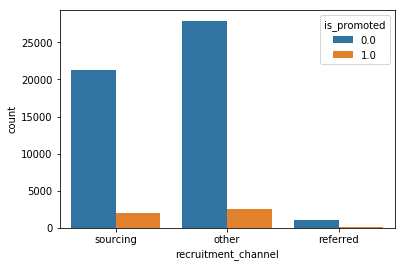

In [40]:
sns.countplot(x='recruitment_channel',data=data, hue='is_promoted');

In [41]:
data.groupby('recruitment_channel')['is_promoted'].value_counts(normalize=True)*100

recruitment_channel  is_promoted
other                0.0            91.604809
                     1.0             8.395191
referred             0.0            87.915937
                     1.0            12.084063
sourcing             0.0            91.498708
                     1.0             8.501292
Name: is_promoted, dtype: float64

In [42]:
# Inference: Employees who are recruited through reference are more probable to be promoted with 12 % chances
#in comparison to others and sourcing with apporx 8% chances

In [43]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'source', 'cat_region'],
      dtype='object')

### Column: no_of_trainings

In [44]:
data['no_of_trainings'].unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9], dtype=int64)

1     63306
2     11531
3      2531
4       658
5       164
6        68
7        21
9         7
8         7
10        5
Name: no_of_trainings, dtype: int64


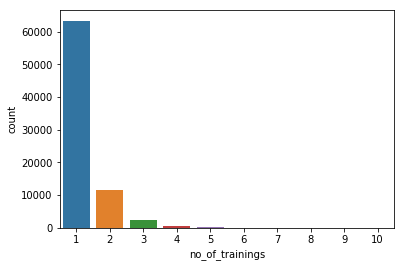

In [164]:
print(data['no_of_trainings'].value_counts())
sns.countplot(data['no_of_trainings']);

In [46]:
data.groupby('no_of_trainings')['is_promoted'].value_counts(normalize=True)*100

no_of_trainings  is_promoted
1                0.0             91.189328
                 1.0              8.810672
2                0.0             92.425191
                 1.0              7.574809
3                0.0             93.130631
                 1.0              6.869369
4                0.0             94.444444
                 1.0              5.555556
5                0.0             97.656250
                 1.0              2.343750
6                0.0             95.454545
                 1.0              4.545455
7                0.0            100.000000
8                0.0            100.000000
9                0.0            100.000000
10               0.0            100.000000
Name: is_promoted, dtype: float64

In [47]:
# Inference: Observing the trend , Employees undergoing lesser no. of trainings are likely to get promoted... 
# no chances of promotions if no. of trainings exceed 6

### Column: age

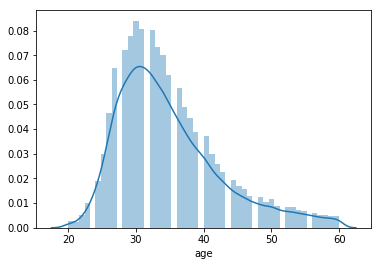

In [48]:
sns.distplot(data['age']);

In [49]:
# Most of the employees are in range 20 to 45

In [50]:
data['age'].describe()

count    78298.000000
mean        34.797619
std          7.665928
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

### Feature Engineering: Converting Age from Numerical to  Categorical column

In [51]:
# Binning of age (ie conversion from muerical to categorical data)
binedges=[19,29,33,39,60]
binlabels=['Young','MatureI','MatureII','Old']
data['cat_age']=pd.cut(data['age'],bins=binedges,labels=binlabels)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source,cat_region,cat_age
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train,high_chances,MatureII
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train,high_chances,MatureI
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train,below_average_chances,MatureII
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train,high_chances,MatureII
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train,below_average_chances,Old


In [52]:
data.groupby('cat_age')['is_promoted'].value_counts(normalize=True)*100

cat_age   is_promoted
Young     0.0            91.517332
          1.0             8.482668
MatureI   0.0            91.034928
          1.0             8.965072
MatureII  0.0            90.729041
          1.0             9.270959
Old       0.0            92.811359
          1.0             7.188641
Name: is_promoted, dtype: float64

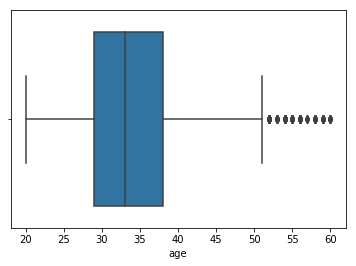

In [53]:
# Distribution of age of only promoted employees
sns.boxplot(data[data['is_promoted']==1]['age'])

In [54]:
# Most of the employees geeting promoton lie in the age-group : 30 to 38

In [55]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'source', 'cat_region', 'cat_age'],
      dtype='object')

### Column: previous_year_rating

In [56]:
data['previous_year_rating'].unique() # Null values need to be imputed

array([ 5.,  3.,  1.,  4., nan,  2.])

In [180]:
data['previous_year_rating'].isnull().sum()

5936

In [181]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source,cat_region,cat_length_of_service,cat_avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train,high_chances,experienced,low
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train,high_chances,mid-level1,avg
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train,below_average_chances,mid-level2,low
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train,high_chances,experienced,low
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train,below_average_chances,entry-level,good


In [182]:
data.groupby('previous_year_rating')['is_promoted'].value_counts(normalize=True)*100

previous_year_rating  is_promoted
1.0                   0.0            98.585891
                      1.0             1.414109
2.0                   0.0            95.715976
                      1.0             4.284024
3.0                   0.0            92.722097
                      1.0             7.277903
4.0                   0.0            92.062367
                      1.0             7.937633
5.0                   0.0            83.638532
                      1.0            16.361468
Name: is_promoted, dtype: float64

In [183]:
# Inference: Resonating with my intuition, employees with higher ratings have better chances of being promoted

In [184]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'source', 'cat_region',
       'cat_length_of_service', 'cat_avg_training_score'],
      dtype='object')

In [185]:
data.groupby(['is_promoted','KPIs_met >80%'])['previous_year_rating'].value_counts(normalize=True)*100

is_promoted  KPIs_met >80%  previous_year_rating
0.0          0              3.0                     42.369172
                            4.0                     18.246115
                            1.0                     17.104345
                            5.0                     11.519188
                            2.0                     10.761180
             1              5.0                     41.740304
                            3.0                     26.333895
                            4.0                     22.529511
                            1.0                      5.005059
                            2.0                      4.391231
1.0          0              5.0                     47.049808
                            3.0                     34.559387
                            4.0                     11.187739
                            2.0                      4.827586
                            1.0                      2.375479
             1       

In [186]:
# Inference: Pattern identofied for Null value imputation!!!
# Considering only topmost rating for each combo of is_promoted and KPIs_met >80%, we fill most probable null values

### Null Value Imputation by observing the probability trends

In [187]:
# part-1 : filling null values by observing the probability trends
data.loc[((data['previous_year_rating'].isnull()) & (data['KPIs_met >80%']==0)&(data['is_promoted']==0)),'previous_year_rating']=3
data['previous_year_rating'].isnull().sum()

3355

In [188]:
# part-1 : Filling null values by observing probability trends
data['previous_year_rating'].fillna(5,inplace=True)
data['previous_year_rating'].isnull().sum()

0

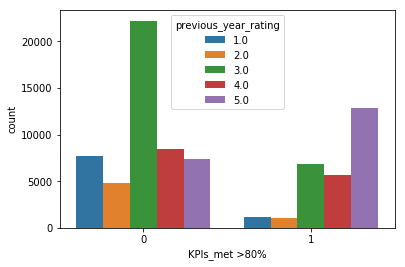

In [189]:
sns.countplot(x= 'KPIs_met >80%', hue='previous_year_rating',data=data);

In [67]:
data.groupby('previous_year_rating')['avg_training_score'].describe()

,count,mean,std,min,25%,50%,75%,max
previous_year_rating,,,,,,,,
1.0,8903.0,60.039088,13.158686,39.0,49.0,54.0,71.0,98.0
2.0,5956.0,61.872733,13.238658,39.0,50.0,59.0,73.0,98.0
3.0,29120.0,64.006937,13.251493,41.0,52.0,61.0,77.0,99.0
4.0,14126.0,64.164307,13.155262,40.0,52.0,61.0,77.0,99.0
5.0,20193.0,63.727183,13.621322,40.0,52.0,60.0,76.0,99.0


In [68]:
# Observation: avg_training_score is not significantly impacting the previous_year_rating

In [69]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source,cat_region,cat_age
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train,high_chances,MatureII
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train,high_chances,MatureI
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train,below_average_chances,MatureII
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train,high_chances,MatureII
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train,below_average_chances,Old


In [70]:
data[data['KPIs_met >80%']==1]['previous_year_rating'].astype('object').value_counts()

5.0    12853
3.0     6902
4.0     5711
1.0     1157
2.0     1097
Name: previous_year_rating, dtype: int64

In [71]:
data.groupby('previous_year_rating')['is_promoted'].value_counts(normalize=True)*100

previous_year_rating  is_promoted
1.0                   0.0            98.585891
                      1.0             1.414109
2.0                   0.0            95.715976
                      1.0             4.284024
3.0                   0.0            93.608189
                      1.0             6.391811
4.0                   0.0            92.062367
                      1.0             7.937633
5.0                   0.0            82.987052
                      1.0            17.012948
Name: is_promoted, dtype: float64

In [72]:
data.previous_year_rating.isnull().sum()

0

### Column: length_of_service

In [73]:
data['length_of_service'].nunique()

35

In [166]:
data['length_of_service'].value_counts().head()

3    10066
4     9747
2     9554
5     8424
7     7895
Name: length_of_service, dtype: int64

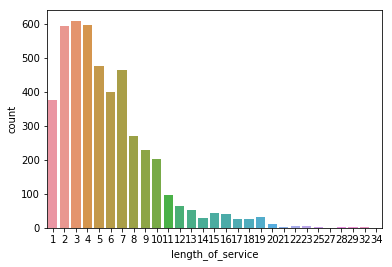

In [75]:
# Length of service of employees who are promoted
sns.countplot(data[data['is_promoted']==1]['length_of_service']);

In [ ]:
# Inference: Maximum employees who are promoted have worked for 3 years... 
#chances of promotions are higher for length of service in range from 2 to 6 years

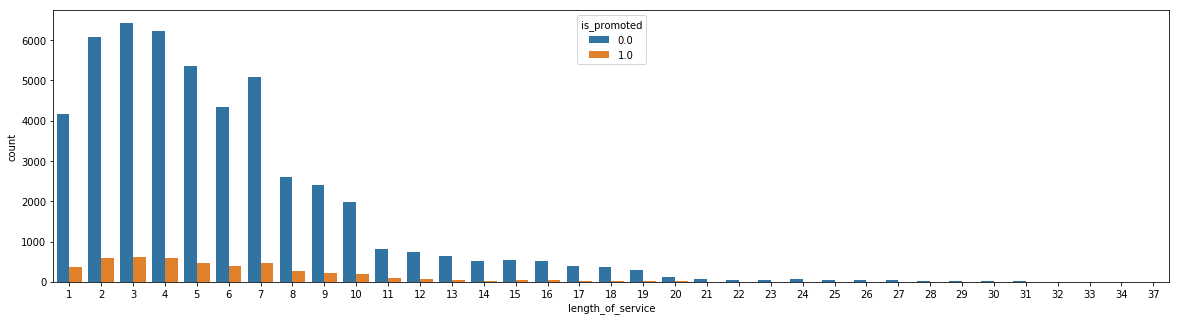

In [76]:
plt.figure(figsize=(20,5))
sns.countplot(x='length_of_service',data=data,hue='is_promoted');

In [77]:
data.groupby('length_of_service')['is_promoted'].value_counts(normalize=True)*100

length_of_service  is_promoted
1                  0.0             91.708819
                   1.0              8.291181
2                  0.0             91.098145
                   1.0              8.901855
3                  0.0             91.340822
                   1.0              8.659178
4                  0.0             91.252194
                   1.0              8.747806
5                  0.0             91.855281
                   1.0              8.144719
6                  0.0             91.529362
                   1.0              8.470638
7                  0.0             91.641146
                   1.0              8.358854
8                  0.0             90.669442
                   1.0              9.330558
9                  0.0             91.289464
                   1.0              8.710536
10                 0.0             90.697674
                   1.0              9.302326
11                 0.0             89.519651
                   1.0  

In [78]:
# employees serving between 2 to 4 years have higher chances of being promoted.. follwed by LOS in range(5,6,7,1) yrs 

In [79]:
data['length_of_service'].unique()  # no Null values!

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

### Feature Engineering: Converting 'length_of_service' from Numerical to Categroical column

In [167]:
# Feature Engineering
data['length_of_service'].describe()

count    78298.000000
mean         5.848974
std          4.248070
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

In [168]:
binedges=[0,3,5,7,37]
binlabels=['entry-level','mid-level1','mid-level2','experienced']
data['cat_length_of_service']=pd.cut(data['length_of_service'],labels=binlabels,bins=binedges)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source,cat_region,cat_length_of_service
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train,high_chances,experienced
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train,high_chances,mid-level1
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train,below_average_chances,mid-level2
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train,high_chances,experienced
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train,below_average_chances,entry-level


In [169]:
data.groupby('cat_length_of_service')['is_promoted'].value_counts(normalize=True)*100

cat_length_of_service  is_promoted
entry-level            0.0            91.343627
                       1.0             8.656373
mid-level1             0.0            91.529839
                       1.0             8.470161
mid-level2             0.0            91.589694
                       1.0             8.410306
experienced            0.0            91.545876
                       1.0             8.454124
Name: is_promoted, dtype: float64

In [83]:
# Inference: each 'cat_length_of_service  ' is almost Equally probable to get promotion!

### Column: 'KPIs_met >80%'

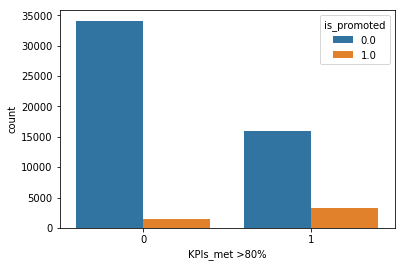

In [84]:
sns.countplot(x=data['KPIs_met >80%'], hue=data['is_promoted'])

In [170]:
data.groupby('KPIs_met >80%')['is_promoted'].value_counts(normalize=True)*100

KPIs_met >80%  is_promoted
0              0.0            96.041332
               1.0             3.958668
1              0.0            83.090560
               1.0            16.909440
Name: is_promoted, dtype: float64

In [171]:
# Employees who have more than 80% KPI's met have greater chances of being promoted.

### Column : 'awards_won?'

In [87]:
data['awards_won?'].isnull().sum()

0

In [88]:
data['awards_won?'].value_counts()

0    76493
1     1805
Name: awards_won?, dtype: int64

In [172]:
print(data.groupby('awards_won?')['is_promoted'].value_counts())
print(data.groupby('awards_won?')['is_promoted'].value_counts(normalize=True)*100)

awards_won?  is_promoted
0            0.0            49429
             1.0             4109
1            0.0              711
             1.0              559
Name: is_promoted, dtype: int64
awards_won?  is_promoted
0            0.0            92.325078
             1.0             7.674922
1            0.0            55.984252
             1.0            44.015748
Name: is_promoted, dtype: float64


In [173]:
# Inference: 
# If an employee has not won awards then very less chances of being promoted
# but, if employee has won awards then atleast 50 % chnaces of being promoted

### Column: avg_training_score      

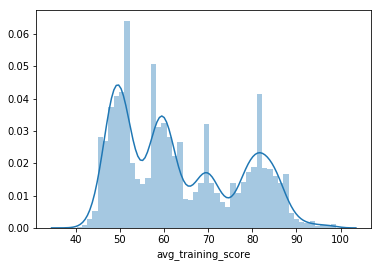

In [174]:
sns.distplot(data['avg_training_score'])

In [92]:
data['avg_training_score'].describe()

count    78298.000000
mean        63.349664
std         13.383664
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

### Feature Engineering: Categorizing on the basis of Multimodal distribution observed

In [175]:
# Feature Engineering:
# Binning on the basis of multimodal distplot indicating 4 different groups
binedges=[38,55,65,75,99]
binlabels=['low','avg','good','excellent']
data['cat_avg_training_score']=pd.cut(data['avg_training_score'],bins=binedges,labels=binlabels)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source,cat_region,cat_length_of_service,cat_avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train,high_chances,experienced,low
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train,high_chances,mid-level1,avg
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train,below_average_chances,mid-level2,low
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train,high_chances,experienced,low
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train,below_average_chances,entry-level,good


In [197]:
data['cat_avg_training_score'].isnull().sum()

0

In [190]:
data.isnull().sum()   # Null Value Imputation Done !!! Only target variable remaining due to test data

employee_id                   0
department                    0
region                        0
education                     0
gender                        0
recruitment_channel           0
no_of_trainings               0
age                           0
previous_year_rating          0
length_of_service             0
KPIs_met >80%                 0
awards_won?                   0
avg_training_score            0
is_promoted               23490
source                        0
cat_region                    0
cat_length_of_service         0
cat_avg_training_score        0
dtype: int64

In [199]:
data.groupby('cat_avg_training_score')['is_promoted'].value_counts(normalize=True)*100

cat_avg_training_score  is_promoted
low                     0.0            95.932780
                        1.0             4.067220
avg                     0.0            92.528534
                        1.0             7.471466
good                    0.0            89.051795
                        1.0            10.948205
excellent               0.0            85.444685
                        1.0            14.555315
Name: is_promoted, dtype: float64

# Conclusion:

*On performing EDA (Exploratory Data Analysis) od this data, I found out following interesting insights that would help us in answering our problem statement ie., which employee is promoted?*

1. The target column is highly inbalanced (91.5% 0's and 8.5% 1's), which may lead to biased output while modelling, thus we would treat it in modelling stage. 
2. Maximum no. of employees in the data are from 'Sales and Marketing' Department but Maximum chances of promotion are in 'Technology' Department with 10.75% followed by 'Procurement' and 'Analytics' departments.
3. Regions were compared on the basis of promotion percentages.
4. Employees having education- "Master's & above"  are more likely to be promoted over other 2 options. I Replaced Null values in Education by Department wise mode.
5. Since percent of promotions per males and females individually are similar ~ 8% .Thus we  can say gender bias is not affecting promotions
6. Employees who are recruited through reference are more probable to be promoted with 12 % chances in comparison to others and sourcing with approx. 8% chances.
7. Observing the trend , Employees undergoing lesser no. of trainings are likely to get promoted, no chances of promotions if no. of trainings exceed 6
8. Most of the employees geeting promoton lie in the age-group : 30 to 38. Age was converted into a categorical column.
9. Resonating with my intuition, employees with higher ratings have better chances of being promoted with secondary dependence on KPI's also.
10.  employees serving between 2 to 4 years have higher chances of being promoted.. follwed by Length of Service in range(5,6,7,1) yrs 
11. Employees who have more than 80% KPI's met have greater chances of being promoted.
12. If an employee has not won awards then he/she has very less chances of being promoted. But, if employee has won awards then atleast 50 % chances of being promoted.
13. Employees with Average training score in the range of 75-99 are most probable to get promoted with 14.5 % chances.

***------------------------------------------------------------------------------------------------------------------***